# Data Science Project Review

***

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Summary

The logistic model only gives us average performance to solve the business objective. We need to consider other factors like gender, family, education levels into the model for better prediction.

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import eli5
from IPython.display import display

import scipy.stats
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.00,48842,48842.00,48842,48842.00,48842,48842,48842,48842,48842,48842.00,48842.00,48842.00,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.64,NaN,189664.13,NaN,10.08,NaN,NaN,NaN,NaN,NaN,1079.07,87.50,40.42,NaN,NaN
std,13.71,NaN,105604.03,NaN,2.57,NaN,NaN,NaN,NaN,NaN,7452.02,403.00,12.39,NaN,NaN
min,17.00,NaN,12285.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1.00,NaN,NaN
25%,28.00,NaN,117550.50,NaN,9.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,40.00,NaN,NaN
50%,37.00,NaN,178144.50,NaN,10.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,40.00,NaN,NaN
75%,48.00,NaN,237642.00,NaN,12.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,45.00,NaN,NaN


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'], dtype='object')

## Data Visualization

### Univariate Data Exploration

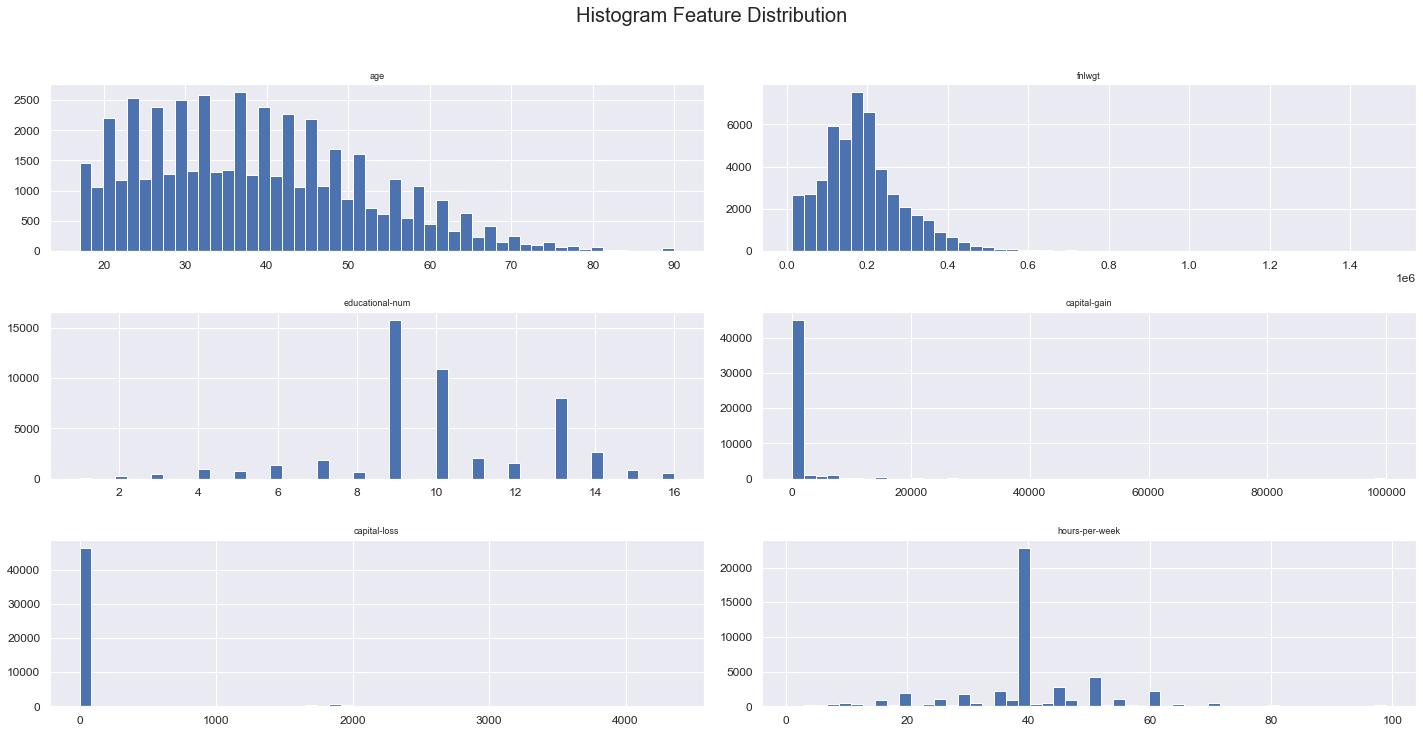

In [7]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

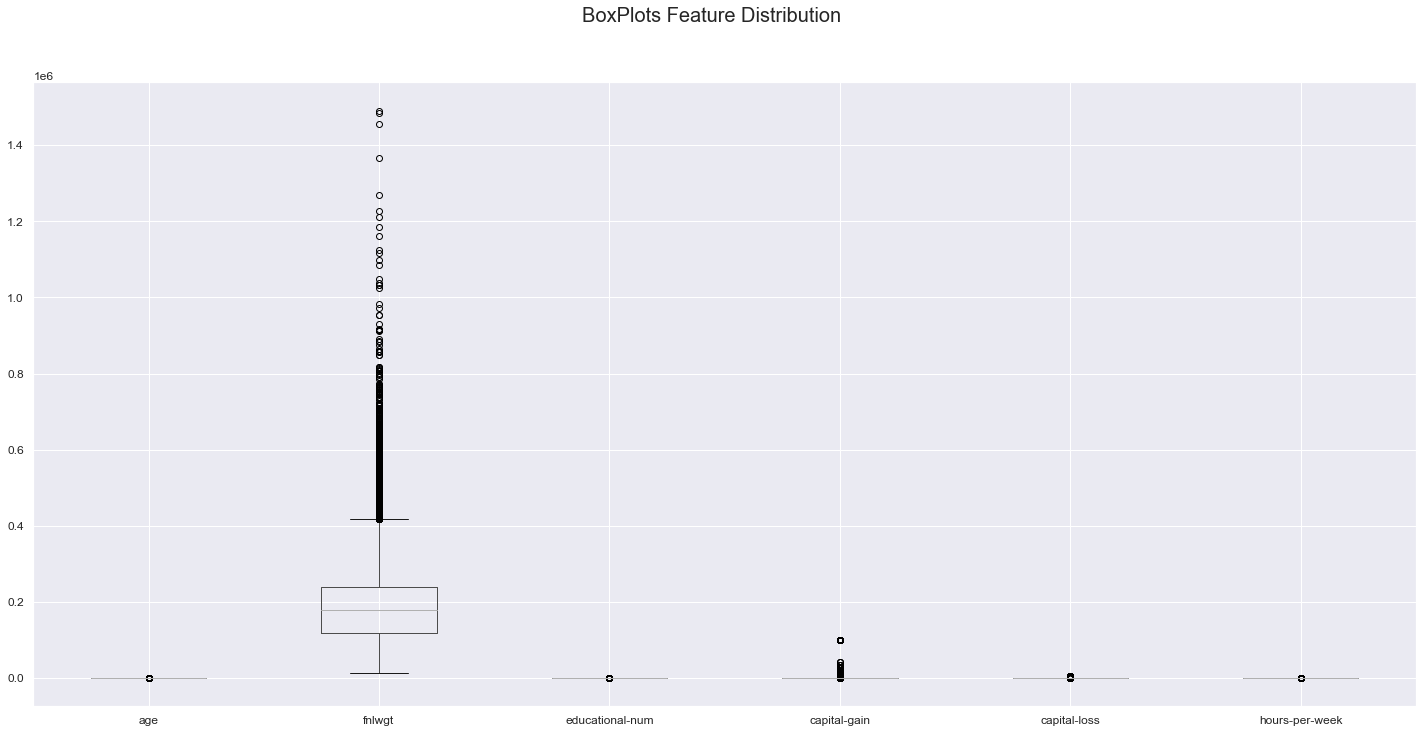

In [8]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

### Correlation

In [9]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.03,0.08,0.06,0.07
fnlwgt,-0.08,1.00,-0.04,-0.00,-0.00,-0.01
educational-num,0.03,-0.04,1.00,0.13,0.08,0.14
capital-gain,0.08,-0.00,0.13,1.00,-0.03,0.08
capital-loss,0.06,-0.00,0.08,-0.03,1.00,0.05
hours-per-week,0.07,-0.01,0.14,0.08,0.05,1.00


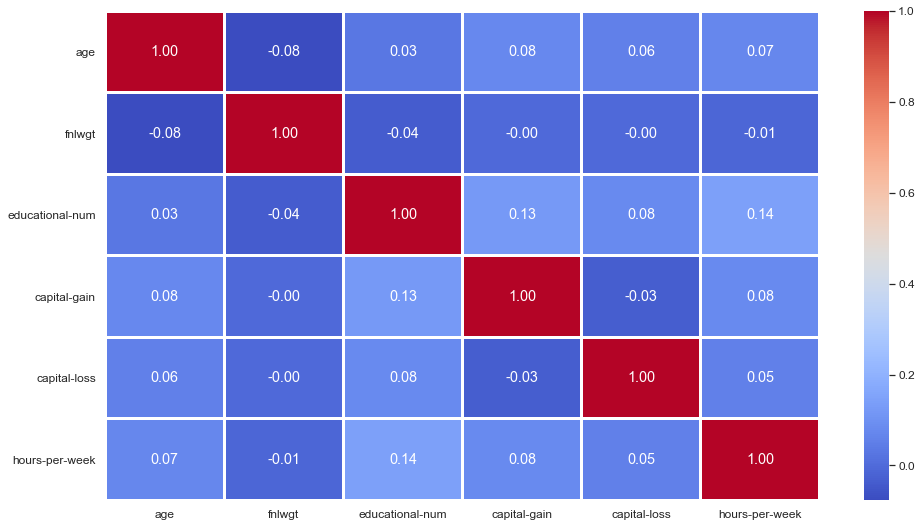

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

## Data Preprocessing

### Drop unwanted features

In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'], dtype='object')

In [12]:
df.drop(['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'gender',
         'native-country'], axis=1, inplace=True)

In [13]:
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,<=50K
1,38,89814,9,0,0,50,<=50K
2,28,336951,12,0,0,40,>50K
3,44,160323,10,7688,0,40,>50K
4,18,103497,10,0,0,30,<=50K


### Treat Missing Values

In [14]:
df.isnull().sum()

age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
income             0
dtype: int64

### Replacing values

In [15]:
df["income"].replace(to_replace="<=50K", value=0, inplace=True)

In [16]:
df["income"].replace(to_replace=">50K", value=1, inplace=True)

In [17]:
df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,18,103497,10,0,0,30,0
...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0
48838,40,154374,9,0,0,40,1
48839,58,151910,9,0,0,40,0
48840,22,201490,9,0,0,20,0


### Type Change

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   fnlwgt           48842 non-null  int64
 2   educational-num  48842 non-null  int64
 3   capital-gain     48842 non-null  int64
 4   capital-loss     48842 non-null  int64
 5   hours-per-week   48842 non-null  int64
 6   income           48842 non-null  int64
dtypes: int64(7)
memory usage: 2.6 MB


### Save to CSV

In [19]:
#df.to_csv("train.csv", index=False)

## Regression Analysis

## Logistic Regression (StatsModel)

In [20]:
df.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income'], dtype='object')

In [21]:
y = df[['income']]
X = df[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

In [22]:
X = sm.add_constant(X)

In [23]:
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.406949
         Iterations 8


In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48835
Method:                           MLE   Df Model:                            6
Date:                Wed, 22 Dec 2021   Pseudo R-squ.:                  0.2604
Time:                        19:04:24   Log-Likelihood:                -19876.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3944      0.098    -85.548      0.000      -8.587      -8.202
age                 0.0426      0.001     42.771      0.000       0.041       0.045
fnlwgt           5.814e-07    1.2e-07      4.832      0.000    3.46e-07    8.17e-07
educational-num     0.3227      0.006     58.074      0.000       0.312       0.334
capital-gain        0.0003   7.99e-06     40.115      0.000       0.000       0.000
capital-loss        0.0007   2.64e-05     25.806      0.000       0.001       0.001
hours-per-week      0.0403      0.001     37.593      0.000       0.038       0.042
===================================================================================
"""

### Logistic Regression (SKLearn)

In [25]:
df.shape

(48842, 7)

In [26]:
X = df.iloc[:,:6]
y = df.iloc[:,6]

In [27]:
Counter(y)

Counter({0: 37155, 1: 11687})

In [28]:
X.values, y.values

(array([[    25, 226802,      7,      0,      0,     40],
        [    38,  89814,      9,      0,      0,     50],
        [    28, 336951,     12,      0,      0,     40],
        ...,
        [    58, 151910,      9,      0,      0,     40],
        [    22, 201490,      9,      0,      0,     20],
        [    52, 287927,      9,  15024,      0,     40]], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 1], dtype=int64))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0, stratify=y)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39073, 6), (9769, 6), (39073,), (9769,))

In [31]:
Counter(y_train), Counter(y_test)

(Counter({0: 29724, 1: 9349}), Counter({0: 7431, 1: 2338}))

In [32]:
lr = LogisticRegression(random_state=0)

In [33]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [34]:
lr.coef_

array([[-0.00732374, -0.00000374, -0.00169204,  0.00033927,  0.00077758,
        -0.00799666]])

In [35]:
lr.intercept_

array([-0.00035477])

In [36]:
y_pred = lr.predict(X_test)

In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7431
           1       0.71      0.27      0.39      2338

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.78      0.80      0.76      9769



In [39]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[7178,  253],
       [1716,  622]], dtype=int64)

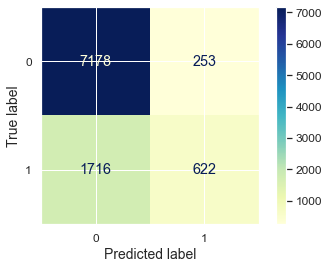

In [40]:
plot_confusion_matrix(estimator=lr, X=X_test, y_true=y_test, cmap='YlGnBu')
plt.show()

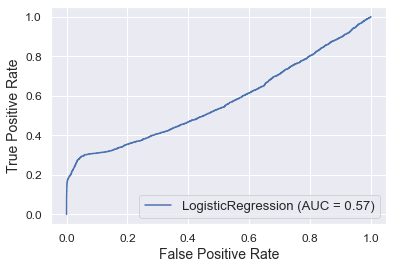

In [41]:
plot_roc_curve(estimator=lr, X=X_test, y=y_test)
plt.show()

#### Python code done by Dennis Lam